# 1)
## a) planteo MAI total son 4 nodos
$$\frac{V_{pq}}{V_{mn}}=(-1)^{p+q+m+n}*\frac{\begin{vmatrix}
Y_{mn}^{pq}
\end{vmatrix}}{\begin{vmatrix}
Y_{mn}^{mn}
\end{vmatrix}}$$
Para los determinantes tenemos que tachar las columnas p y q y las filas m y n.
$$V_2\equiv V_{34}$$
$$V_1\equiv V_{14}$$
$$MAI=\begin{bmatrix}
\frac{1}{R_0}+\frac{1}{Z_A} & -\frac{1}{R_0} & -\frac{1}{Z_A} & 0\\
-\frac{1}{R_0} & \frac{1}{R_0} + \frac{1}{R_0}+\frac{1}{Z_B} & -\frac{1}{R_0} &-\frac{1}{Z_B}\\
-\frac{1}{Z_A} & -\frac{1}{R_0} & \frac{1}{R_0}+\frac{1}{R_0}+\frac{1}{Z_A} & -\frac{1}{R_0}\\
0 & -\frac{1}{Z_B} & -\frac{1}{R_0} & \frac{1}{Z_B}+\frac{1}{R_0}
\end{bmatrix}$$

In [3]:
from scipy import signal
from sympy import *
import matplotlib.pyplot as plt
import math as m
from splane import pzmap, grpDelay, bodePlot
import numpy as np

Ro, Za, Zb, S= symbols('Ro Za Zb S')

MAI_1= Matrix(([1/Ro +1/Za, -1/Ro, -1/Za, 0],
             [-1/Ro, 1/Ro + 1/Ro +1/Zb,-1/Ro, -1/Zb],
             [-1/Za, -1/Ro,1/Ro+1/Ro+1/Za,-1/Ro],
             [0,-1/Zb,-1/Ro,1/Zb+1/Ro]))
MAI_2= Matrix(([1/Ro +1/Za, -1/Ro, -1/Za, 0],
             [-1/Ro, 1/Ro + 1/Ro +1/Zb,-1/Ro, -1/Zb],
             [-1/Za, -1/Ro,1/Ro+1/Ro+1/Za,-1/Ro],
             [0,-1/Zb,-1/Ro,1/Zb+1/Ro]))
print("MAI=")
pprint(MAI_1)
Y_arriba=MAI_1

Y_arriba.col_del(3)
Y_arriba.col_del(2)
Y_arriba.row_del(3)
Y_arriba.row_del(0)
print("La matriz Y de arriba queda:")
pprint(Y_arriba)

Y_abajo=MAI_2
Y_abajo.col_del(3)
Y_abajo.col_del(0)
Y_abajo.row_del(3)
Y_abajo.row_del(0)
print("La matriz Y de abajo queda:")
pprint(Y_abajo)

T_S=(-1)**(3+4+1+4) * Y_arriba.det()/Y_abajo.det()
print("La T(S) queda:")
pprint(simplify(T_S))
print("Si reemplazo Ro^2=Za*Zb")
pprint(T_S.subs(Ro**2,Za*Zb))
print("Le tiro simplify")
pprint(simplify(T_S.subs(Za*Zb,Ro**2)))

MAI=
⎡1    1     -1       -1            ⎤
⎢── + ──    ───      ───       0   ⎥
⎢Za   Ro     Ro       Za           ⎥
⎢                                  ⎥
⎢  -1     1    2     -1       -1   ⎥
⎢  ───    ── + ──    ───      ───  ⎥
⎢   Ro    Zb   Ro     Ro       Zb  ⎥
⎢                                  ⎥
⎢  -1       -1     1    2     -1   ⎥
⎢  ───      ───    ── + ──    ───  ⎥
⎢   Za       Ro    Za   Ro     Ro  ⎥
⎢                                  ⎥
⎢           -1       -1     1    1 ⎥
⎢   0       ───      ───    ── + ──⎥
⎣            Zb       Ro    Zb   Ro⎦
La matriz Y de arriba queda:
⎡-1   1    2 ⎤
⎢───  ── + ──⎥
⎢ Ro  Zb   Ro⎥
⎢            ⎥
⎢-1     -1   ⎥
⎢───    ───  ⎥
⎣ Za     Ro  ⎦
La matriz Y de abajo queda:
⎡1    2     -1   ⎤
⎢── + ──    ───  ⎥
⎢Zb   Ro     Ro  ⎥
⎢                ⎥
⎢  -1     1    2 ⎥
⎢  ───    ── + ──⎥
⎣   Ro    Za   Ro⎦
La T(S) queda:
        2                        
      Ro  + 2⋅Ro⋅Zb + Za⋅Zb      
─────────────────────────────────
  2                         

In [13]:
####Determino variables#######

#Za, Zb = symbols('Za Zb') ya estan declaradas arriba

####Determino las ecuaciones simultaneas a resolver ####
####Con condiciones de diseño#########
ecuaciones = [
    (((Za*Zb*(1 + Zb))/(Za+ Zb +2*Za*Zb) -S/(S**2 +S +1))),
    (Za*Zb-1)
    
     ]

####Resuelvo para Za Zb#######

conjunto_sol=solve(ecuaciones, Za, Zb, set=True)

###imprimo###
Nombres=conjunto_sol[0]
Soluciones=list(conjunto_sol[1])
for k in range(len(Soluciones)):
    
    print('Solucion #%d' % (k+1))
    for k2, nombre in enumerate(Nombres):
        print('\t%s: %s' % (nombre, Soluciones[k][k2]) )


Solucion #1
	Za: S + 1/S
	Zb: S/(S**2 + 1)


# b)
<img src="./Circuito 1-b.PNG" align="center" width="80%" />

# 2) 
## a)Partiendo de:
$\frac{V1}{V2}=e^\gamma =\frac{I1}{I2};$ Estando el circuito cargado con $Z_{i2}$ y $Z_{i1}=\sqrt{\frac{AB}{CD}}$;$Z_{i2}=\sqrt{\frac{DB}{CA}}$
$$V_1=A*V_2 + B*(-I_2)=A*V_2 + B*\frac{V2}{Zi2}\rightarrow$$
$$\frac{V1}{V2}=A + \frac{B}{Z_{i2}}\rightarrow\frac{V1}{V2}=A + {B}\sqrt{\frac{CA}{DB}}$$
Saco factor comun $\sqrt{\frac{A}{D}}$ que sabemos que en la condicion particular de simetria($A=D$) se hace 1.
$$\frac{V_1}{V_2}=\sqrt{\frac{A}{D}}*(\sqrt{\frac{D}{A}}*A + B*\sqrt{\frac{C}{D}})=\sqrt{\frac{A}{D}}*(\sqrt{AD}+\sqrt{BC})$$
Por otro lado: $I_1=C*V_2 + D*(-I_2)=C*(Z_{i2}*(-I_2))+D*(-I_2)\rightarrow$
$$\frac{I_1}{-I_2}=C*Z_{i2}+D\rightarrow\frac{I_1}{-I_2}=C*\sqrt{\frac{DB}{CA}}+D$$
Saco un facotr comun $\sqrt{\frac{D}{A}}$.
$$\frac{I_1}{-I_2}=\sqrt{\frac{D}{A}}[C*\sqrt{\frac{B}{C}}+D*\sqrt{\frac{A}{B}}]=\sqrt{\frac{D}{A}}[\sqrt{BC}+\sqrt{AD}]$$
Por ultimo sabemos que la potencia es: $V*I$ asique planteamos un cociente de potencias.
$$\frac{V_1}{V_2}*\frac{I_1}{-I_2}=\frac{P_1}{P_2}=e^{2\gamma}=[\sqrt{AD}+\sqrt{BC}]^2$$
$$e^\gamma=\sqrt{AD}+\sqrt{BC}$$
Por identidades trigonometricas hiperbolicas: $e^x=cosh(x) + sinh(x)$
Entonces:$e^\gamma=cosh(\gamma) + sinh(\gamma)=\sqrt{AD}+\sqrt{BC}$
        $$e^{-\gamma}=cosh(\gamma) - sinh(\gamma)=\sqrt{AD}-\sqrt{BC}$$
De aqui que: $cosh(\gamma)=\sqrt{AD}$ y $sinh(\gamma)=\sqrt{BC}$
Para redondear, con estas 4 ecuaciones podemos hallar cualquier parametro T.
$$Z_{i1}=\sqrt{\frac{AB}{CD}}$$
$$Z_{i2}=\sqrt{\frac{DB}{CA}}$$
$$cosh(\gamma)=\sqrt{AD}$$
$$sinh(\gamma)=\sqrt{BC}$$
Listamos los parametros T:
$$A=\sqrt{\frac{Z_{i1}}{Z_{i2}}}*cosh(\gamma)$$
$$B=\sqrt{Z_{i1}Z_{i2}}sinh(\gamma)$$
$$C=\frac{sinh(\gamma)}{\sqrt{Z_{i1}Z_{i2}}}$$
$$D=\sqrt{\frac{Z_{i2}}{Z_{i1}}}*cosh(\gamma)$$

$$T=\begin{bmatrix}
\sqrt{\frac{Z_{i1}}{Z_{i2}}}*cosh(\gamma) & \sqrt{Z_{i1}Z_{i2}}sinh(\gamma) \\
\frac{sinh(\gamma)}{\sqrt{Z_{i1}Z_{i2}}} & \sqrt{\frac{Z_{i2}}{Z_{i1}}}*cosh(\gamma)
\end{bmatrix}$$
## b) Lo piden en admitancia asique tiro galerazo:
La matriz Y de una celda pi generica es:
$$Y=\begin{bmatrix}
Y_1 + Y_2 & -Y_2 \\
-Y_2 & Y_3 + Y_2
\end{bmatrix}$$

$$T=\begin{bmatrix}
A=\frac{-Y_{22}}{Y_{21}} & B=\frac{-1}{Y_{21}} \\
C=\frac{-\Delta{Y}}{Y_{21}} & D=\frac{-Y_{11}}{Y_{21}}
\end{bmatrix}$$
Y se nos da como dato:$Z_{o1}=50\Omega$;$Z_{o2}=300\Omega$;$\beta=30\equiv0.523598776$;<br>
Voy a hacer una aclaracion(innecesaria para los calculos), importante para la simulacion
$$\alpha_{pot}=\alpha_{VdB}+10log(\frac{300}{50})=0dB\rightarrow$$
$$\alpha_{VdB}=-7.781512504$$
$$T=\begin{bmatrix}
\sqrt{\frac{300}{50}}*cosh(j*30) & \sqrt{300*50}sinh(j*30) \\
\frac{sinh(j*30)}{\sqrt{300*50}} & \sqrt{\frac{50}{300}}*cosh(j*30)
\end{bmatrix}$$
Paso a resolver igualando terminos...
## Bonus track Filtros digitales del 23/05/2019
$$Y_{(Z)}=X_{(Z)}*Z^{-2}+W_{(Z)}$$
$$W_{(Z)}=0.8(X_{(Z)}-Y_{(Z)}*Z^{-2})$$
De aqui que:
$$\frac{Y_{(Z)}}{X_{(Z)}}=H_{(Z)}=\frac{Z^{-2}+0.8}{1+0.8*Z^{-2}}=\frac{0.8*Z^{2}+1}{Z^{2}+0.8}$$

2 zeros: [-0.+1.11803399j  0.-1.11803399j]
2 poles: [-0.+0.89442719j  0.-0.89442719j]
gain: 0.8


Text(0, 0.5, 'Magnitude(dB)')

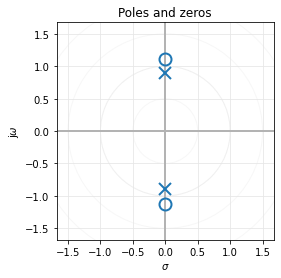

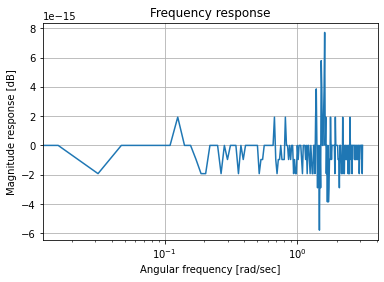

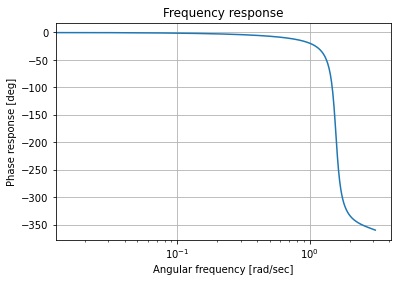

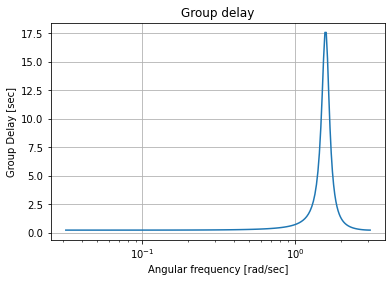

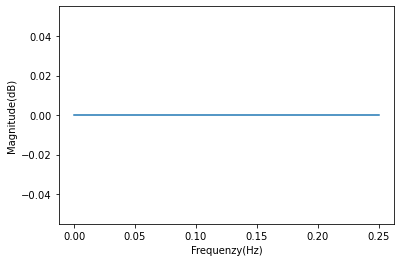

In [11]:
fs=1
numz=[0.8,0,1]
denz=[1,0,0.8]
mi_filtro_digital=signal.TransferFunction(numz,denz, dt=1/fs)
[w,h]=signal.freqz(numz,denz,worN = 2)
w=fs*w/(2*m.pi)
h_db=20*np.log10(abs(h))
pzmap(mi_filtro_digital)
bodePlot(mi_filtro_digital)#Bode plot le hace mucho zoom y parece medio rota la señal
grpDelay(mi_filtro_digital)
plt.figure()
plt.plot(w, h_db); plt.xlabel('Frequenzy(Hz)')
plt.ylabel('Magnitude(dB)')